<a href="https://colab.research.google.com/github/TshivhaseNdiene/coursera-test/blob/main/L5_MLP_for_MNIST_SGD_with_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MLP for the mnist problem

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [4]:
batch_size =128
num_classes = 10
epochs = 100

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes )

In [6]:
model = Sequential()

model.add(Dense(512,
                input_shape =(784,),
                activation = 'relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(10,
                activation = 'softmax'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
#FIT THE MODEL

history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs =100,
                    verbose=1)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1199 - accuracy: 0.8463 - val_loss: 0.0727 - val_accuracy: 0.9055
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0671 - accuracy: 0.9082 - val_loss: 0.0574 - val_accuracy: 0.9234
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0559 - accuracy: 0.9228 - val_loss: 0.0500 - val_accuracy: 0.9331
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0490 - accuracy: 0.9322 - val_loss: 0.0446 - val_accuracy: 0.9382
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9390 - val_loss: 0.0407 - val_accuracy: 0.9430
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0401 - accuracy: 0.9444 - val_loss: 0.0374 - val_accuracy: 0.9476
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9493 - val_loss: 0.0351 - val_

In [8]:
#EVALUATE THE MODEL

train_accuracy = model.evaluate(x_train,
                                y_train,
                                verbose = 1)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0039 - accuracy: 0.9979


In [9]:
test_accuracy = model.evaluate(x_test,
                               y_test,
                               verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9828


In [10]:
print(train_accuracy, test_accuracy)

[0.003935384098440409, 0.9978500008583069] [0.012885203585028648, 0.9828000068664551]


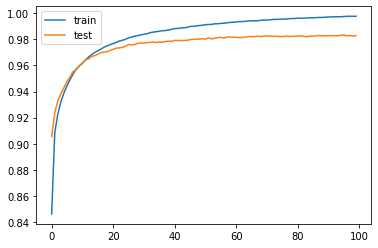

In [11]:
#PLOT HISTORY

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# SGD with Batch Normalization

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [24]:
batch_size =128
num_classes = 10
epochs = 100

In [25]:
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes )

In [26]:
#DEFINE MODEL

model = Sequential()

model.add(Dense(50, 
                input_dim=784, 
                activation='relu', 
                kernel_initializer='he_uniform'))

model.add(BatchNormalization())

model.add(Dense(10,activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])


In [27]:
history = model.fit(x_train, 
                    y_train, 
                    validation_data=(x_test, 
                                     y_test), 
                    epochs=100, 
                    verbose=1)

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.8592 - val_loss: 0.0579 - val_accuracy: 0.9261
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0561 - accuracy: 0.9236 - val_loss: 0.0419 - val_accuracy: 0.9424
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9387 - val_loss: 0.0362 - val_accuracy: 0.9485
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9467 - val_loss: 0.0327 - val_accuracy: 0.9527
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9524 - val_loss: 0.0295 - val_accuracy: 0.9593
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9563 - val_loss: 0.0284 - val_accuracy: 0.9601
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0307 - accuracy: 0.9590 - val_loss: 0.0276 - val_ac

In [29]:
train_accuracy = model.evaluate(x_train, 
                                y_train, 
                                verbose=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0061 - accuracy: 0.9945


In [30]:
test_accuracy = model.evaluate(x_test, 
                               y_test,
                               verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9713


In [31]:
print(train_accuracy, test_accuracy)

[0.0060762581415474415, 0.9944999814033508] [0.02442009560763836, 0.9713000059127808]


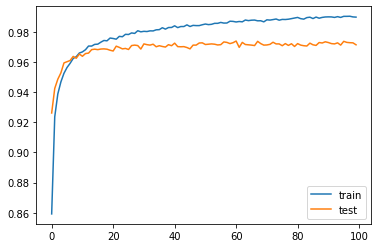

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()